In [154]:
import numpy as np
import pandas as pd
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions
import math
import matplotlib.pyplot as plt  

In [155]:
import geopandas as gpd
df_osm = gpd.read_file(r'../../data/raw/Shrewsbury/edges.shp')

In [156]:
with open(r'../../data/tidy/Shrewsbury_join_tidy_density.csv') as Shrewsbury_parcel:
    df_Shrewsbury_parcel=pd.read_csv(Shrewsbury_parcel)

C:\Users\Mahsa\Anaconda3\envs\oxe\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (24,32,34) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [157]:
df_Shrewsbury_parcel['FULL_STR'].sort_values().unique()

array(['ABBY LN', 'ACORN ST', 'ADAMS FARM RD', 'ADAMS RD', 'ADIN DR',
       'AFRA DR', 'ALDEN AVE', 'ALICE AVE', 'ALMONDWOOD CIR',
       'ALTHEA PATH', 'AMBERLY LN', 'AMHERST RD', 'ANGELA AVE',
       'ANGLIN LN', 'APPALOOSA DR', 'APPLE SEED DR', 'APPLEWOOD CIR',
       'ARBOR CIR', 'ARBOR DR', 'ARCH ST', 'ARCTURUS DR', 'ARGILA LN',
       'ARNOLD RD', 'ARROWWOOD DR', 'ARTEMAS AVE', 'ASHLEY DR',
       'ASHMONT ST', 'ASHTON DR', 'ASHWOOD CIR', 'ASPEN RD', 'ATWOOD LN',
       'AUDUBON DR', 'AVALON WAY', 'AVON AVE', 'AVON DR', 'BAGLEY AVE',
       'BAILEY RD', 'BAKER AVE', 'BALDWIN CIR', 'BALSAM CIR',
       'BANNISTER ST', 'BARNARD ST', 'BARROWS RD', 'BAY RD',
       'BAY VIEW DR', 'BAYBERRY CIR', 'BEACH ISLAND', 'BEACH RD',
       'BEACON ST', 'BEAVER DR', 'BECKET ST', 'BELLINGHAM WAY',
       'BELLRIDGE DR', 'BENJAMIN LN', 'BENTON ST', 'BERKSHIRE RD',
       'BETHS RD', 'BEVERLY HILL DR', 'BEVERLY RD', 'BIRCH BRUSH RD',
       'BIRCH LN', 'BIRCHWOOD DR', 'BITTERSWEET CIR', 'BLACKSTO

In [158]:
#df_parcel = pd.DataFrame(Index: [i in range(len(df_Shrewsbury_parcel['FULL_STR'].unique()))], columns=['FULL_STR', 'parcels', 'length'])
parcel=[]
for i in df_Shrewsbury_parcel['FULL_STR'].unique():
    df=df_Shrewsbury_parcel.loc[df_Shrewsbury_parcel.FULL_STR==i]
    parcel.append(len(df.index))
len(parcel)

707

In [159]:
FULL_STR=df_Shrewsbury_parcel['FULL_STR'].unique().tolist()
join = {'FULL_STR':FULL_STR,'parcels':parcel}
df_FULL_STR_parcels = pd.DataFrame(join)

In [160]:
df_osm['name'].sort_values().unique()

array(['Acorn Street', 'Adams Farm Road', 'Adams Road', 'Adin Drive',
       'Alden Avenue', 'Alice Avenue', 'Almondwood Circle', 'Althea Path',
       'Amberly Lane', 'Amherst Road', 'Angela Avenue', 'Anglin Lane',
       'Appaloosa Drive', 'Apple Seed Drive', 'Applewood Circle',
       'Arbor Circle', 'Arbor Drive', 'Arch Street', 'Arcturus Drive',
       'Argila Lane', 'Arnold Road', 'Arrowwood Drive', 'Artemas Avenue',
       'Ashley Drive', 'Ashmont Street', 'Ashton Drive', 'Ashwood Circle',
       'Aspen Road', 'Atwood Lane', 'Audubon Drive', 'Avalon Way',
       'Avon Avenue', 'Avon Drive', 'Bailey Road', 'Baker Avenue',
       'Baldwin Circle', 'Balsam Circle', 'Barnard Street',
       'Barrows Road', 'Bay View Drive', 'Bayberry Circle',
       'Beacon Street', 'Beaver Drive', 'Bellingham Way',
       'Bellridge Drive', 'Benjamin Lane', 'Benton Street',
       'Berkshire Road', 'Beths Road', 'Beverly Hill Drive',
       'Beverly Road', 'Birch Brush Road', 'Birch Lane',
       '

In [161]:
df_osm.to_csv(r'../../results/outcomes/Shrewsbury_street_length_osm.csv', index = False)

In [162]:
df_osm

,u,v,key,osmid,oneway,lanes,ref,name,highway,maxspeed,width,length,from,to,access,bridge,geometry
0,69008159,71718041,0,455364322,0,2,US 20,Hartford Turnpike,primary,50 mph,18.3,183.974,71718041,69008159,None,None,"LINESTRING (-71.67313 42.27914, -71.67295 42.2..."
1,71375134,71532963,0,9414802,0,None,None,Harrington Farms Way,residential,None,None,60.788,71532963,71375134,None,None,"LINESTRING (-71.71240 42.27993, -71.71176 42.2..."
2,71375134,71587232,0,9415013,0,2,MA 140,Grafton Street,primary,35 mph,12.2,67.963,71587232,71375134,None,None,"LINESTRING (-71.71186 42.28065, -71.71184 42.2..."
3,71375134,71528522,0,9415013,0,2,MA 140,Grafton Street,primary,35 mph,12.2,77.214,71528522,71375134,None,None,"LINESTRING (-71.71128 42.27943, -71.71147 42.2..."
4,71375244,71663146,0,9414427,1,2,MA 9,Boston Turnpike,trunk,45 mph,30.2,106.263,71375244,71663146,None,None,"LINESTRING (-71.73834 42.27567, -71.73870 42.2..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,6907824676,6907824676,0,737777927,0,1,None,None,residential,None,9.1,81.621,6907824676,6907824676,None,None,"LINESTRING (-71.73886 42.26837, -71.73884 42.2..."
1996,7911774073,7911774080,0,847854609,0,None,None,None,residential,None,None,12.821,7911774080,7911774073,None,None,"LINESTRING (-71.75289 42.27681, -71.75274 42.2..."
1997,7911774079,7911774080,0,"[847854609, 847854611]",0,None,None,Lakeside Path,residential,None,None,95.404,7911774080,7911774079,None,None,"LINESTRING (-71.75289 42.27681, -71.75311 42.2..."
1998,7911774080,7911774081,0,847854610,0,None,None,None,residential,None,None,9.655,7911774081,7911774080,None,None,"LINESTRING (-71.75286 42.27673, -71.75289 42.2..."


In [163]:
df_FULL_STR_parcels['FULL_STR']=df_FULL_STR_parcels['FULL_STR'].str.replace('AVE', 'AVENUE')
df_FULL_STR_parcels['FULL_STR']=df_FULL_STR_parcels['FULL_STR'].str.replace('BLVD','BOULEVARD')
df_FULL_STR_parcels['FULL_STR']=df_FULL_STR_parcels['FULL_STR'].str.replace('CIR','CIRCLE')
df_FULL_STR_parcels['FULL_STR']=df_FULL_STR_parcels['FULL_STR'].str.replace('CT','COURT')
df_FULL_STR_parcels['FULL_STR']=df_FULL_STR_parcels['FULL_STR'].str.replace('CV','COVE')
df_FULL_STR_parcels['FULL_STR']=df_FULL_STR_parcels['FULL_STR'].str.replace('DR','DRIVE')
df_FULL_STR_parcels['FULL_STR']=df_FULL_STR_parcels['FULL_STR'].str.replace('LN','LANE')
df_FULL_STR_parcels['FULL_STR']=df_FULL_STR_parcels['FULL_STR'].str.replace('PKWY','PARKWAY')
df_FULL_STR_parcels['FULL_STR']=df_FULL_STR_parcels['FULL_STR'].str.replace('PL','PLACE')
df_FULL_STR_parcels['FULL_STR']=df_FULL_STR_parcels['FULL_STR'].str.replace('RD','ROAD')
df_FULL_STR_parcels['FULL_STR']=df_FULL_STR_parcels['FULL_STR'].str.replace('ST','STREET')
df_FULL_STR_parcels['FULL_STR']=df_FULL_STR_parcels['FULL_STR'].str.replace('TER','TERRACE')
df_FULL_STR_parcels['FULL_STR']=df_FULL_STR_parcels['FULL_STR'].str.replace('TPKE','TURNPIKE')

In [164]:
df_FULL_STR_parcels["length"] = ""

In [165]:
df_osm['name']

0          Hartford Turnpike
1       Harrington Farms Way
2             Grafton Street
3             Grafton Street
4            Boston Turnpike
                ...         
1995                    None
1996                    None
1997           Lakeside Path
1998                    None
1999                    None
Name: name, Length: 2000, dtype: object

In [166]:
df_osm['name']=df_osm['name'].str.upper()

In [167]:
df_osm['name']

0          HARTFORD TURNPIKE
1       HARRINGTON FARMS WAY
2             GRAFTON STREET
3             GRAFTON STREET
4            BOSTON TURNPIKE
                ...         
1995                    None
1996                    None
1997           LAKESIDE PATH
1998                    None
1999                    None
Name: name, Length: 2000, dtype: object

In [168]:
df_FULL_STR_parcels

,FULL_STR,parcels,length
0,VINNIE WAY,30,
1,S QUINSIGAMOND AVENUE,423,
2,FLAGG ROAD,23,
3,RAWSON HILL DRIVE,80,
4,EVERGREEN STREET,4,
...,...,...,...
702,SHREWSBURY GREEN DRIVE,752,
703,DEAN DRIVE,1,
704,PAYTON PLACE,36,
705,ABBY LANE,36,


In [169]:
FULL_STR=df_FULL_STR_parcels['FULL_STR'].tolist()
FULL_STR

['VINNIE WAY',
 'S QUINSIGAMOND AVENUE',
 'FLAGG ROAD',
 'RAWSON HILL DRIVE',
 'EVERGREEN STREET',
 'SPRING STREET',
 'OLDE COLONY DRIVE',
 'ROUND TABLE ROAD',
 'DAVID ROAD',
 'KING ARTHUR ROAD',
 'BOYLSTREETON STREET',
 'PARTRIDGE HILL ROAD',
 'FOX HILL ROAD',
 'GULF STREET',
 'SEWALL DRIVE',
 'WACHUSETT CIRCLE',
 'LONGFELLOW ROAD',
 'BRYANT AVENUE',
 'BROOKLAWN PARKWAY',
 'IRA AVENUE',
 'CAMELOT DRIVE',
 'JAMIE LANE',
 'HIGH STREET',
 'PRATT LANE',
 'OAKLAND AVENUE',
 'SATURN DRIVE',
 'HOLMAN STREET',
 'OLD BROOK ROAD',
 'HILLANDO DRIVE',
 'SHEPAROAD LANE',
 'ODONNELL AVENUE',
 'SPRUCE STREET',
 'HARVAROAD AVENUE',
 'TURTLE CREEK CIRCLE',
 'FLAMINGO CIRCLE',
 'EASTREETWOOD ROAD',
 'BRIGHTSIDE AVENUE',
 'STREETATE STREET',
 'WASHINGTON STREET',
 'HUNTING AVENUE',
 'BENJAMIN LANE',
 'SOUTH STREET',
 'FLORAL STREET',
 'FLANAGAN DRIVE',
 'VIOLETTE CIRCLE',
 'AVON AVENUE',
 'OAK STREET',
 'OREGON AVENUE',
 'MELVIN AVENUE',
 'DEERFIELD ROAD',
 'KEMBLE DRIVE',
 'LIBERTY TREE LANE',
 'HEATH 

In [170]:
#df_length = pd.DataFrame({'FULL_STR' : [],'Length' : []})
#FULL_STR=df_Shrewsbury_parcel['FULL_STR'].unique()
street_name=[]
length=[]
for i in range(len(FULL_STR)):
    A=df_osm['length'].loc[df_osm.name==FULL_STR[i]].tolist()
    A=sum(A)
    if A==0:
        pass
    else:
        index=df[df['FULL_STR'] == True].index.tolist()
        df_FULL_STR_parcels['length'].loc[df_osm.name==FULL_STR[i]]=A

C:\Users\Mahsa\Anaconda3\envs\oxe\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [178]:
df_FULL_STR_parcels

,FULL_STR,parcels,length
0,VINNIE WAY,30,
1,S QUINSIGAMOND AVENUE,423,1478.804
2,FLAGG ROAD,23,5906.856
3,RAWSON HILL DRIVE,80,5906.856
4,EVERGREEN STREET,4,
...,...,...,...
702,SHREWSBURY GREEN DRIVE,752,448.815
703,DEAN DRIVE,1,448.815
704,PAYTON PLACE,36,1345.954
705,ABBY LANE,36,1345.954


In [183]:
df_FULL_STR_parcels['length'].replace('', np.nan, inplace=True)

In [188]:
df_FULL_STR_parcels.dropna(subset=['length'], inplace=True)

In [189]:
df_FULL_STR_parcels

,FULL_STR,parcels,length
1,S QUINSIGAMOND AVENUE,423,1478.804
2,FLAGG ROAD,23,5906.856
3,RAWSON HILL DRIVE,80,5906.856
10,BOYLSTREETON STREET,172,1779.288
11,PARTRIDGE HILL ROAD,13,1779.288
...,...,...,...
702,SHREWSBURY GREEN DRIVE,752,448.815
703,DEAN DRIVE,1,448.815
704,PAYTON PLACE,36,1345.954
705,ABBY LANE,36,1345.954


In [190]:
df_FULL_STR_parcels['density'] = df_FULL_STR_parcels['parcels']/df_FULL_STR_parcels['length']
df_FULL_STR_parcels['log_density'] = np.log10(df_FULL_STR_parcels['density'])

In [192]:
df_FULL_STR_parcels

,FULL_STR,parcels,length,density,log_density
1,S QUINSIGAMOND AVENUE,423,1478.804,0.286042,-0.543570
2,FLAGG ROAD,23,5906.856,0.003894,-2.409629
3,RAWSON HILL DRIVE,80,5906.856,0.013544,-1.868266
10,BOYLSTREETON STREET,172,1779.288,0.096668,-1.014718
11,PARTRIDGE HILL ROAD,13,1779.288,0.007306,-2.136303
...,...,...,...,...,...
702,SHREWSBURY GREEN DRIVE,752,448.815,1.675523,0.224150
703,DEAN DRIVE,1,448.815,0.002228,-2.652067
704,PAYTON PLACE,36,1345.954,0.026747,-1.572728
705,ABBY LANE,36,1345.954,0.026747,-1.572728


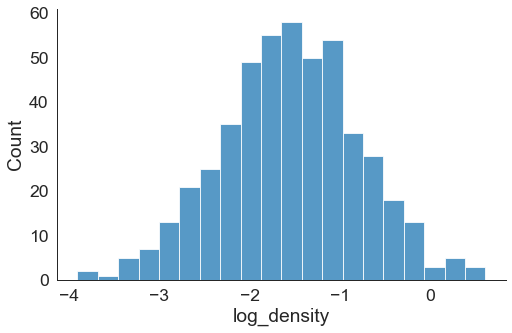

In [194]:
# plotting histogram for density of parcels
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=df_FULL_STR_parcels['log_density'], kind="hist", bins = 20, aspect = 1.5)

,sumsquare_error,aic,bic,kl_div
beta,0.974643,429.681065,-2936.672564,inf
norm,0.976217,426.490743,-2948.240136,inf
lognorm,0.978445,429.593137,-2940.981141,inf
gamma,0.980179,429.478360,-2940.134630,inf
burr,1.490787,472.065599,-2733.527958,inf


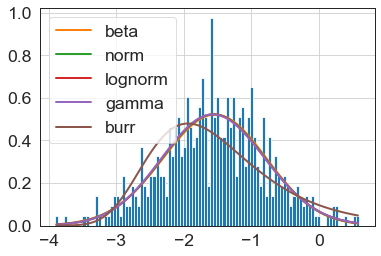

In [197]:
f = Fitter(df_FULL_STR_parcels['log_density'],
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()
f.summary()

In [198]:
f.get_best(method = 'sumsquare_error')

{'beta': {'a': 271.2961348958089,
  'b': 164.71100500606877,
  'loc': -22.045772312762836,
  'scale': 32.93532788928974}}

In [199]:
f.fitted_param["burr"]

(1539.9258940499903, 91315.8490899115, -1183.5872875136638, 1172.917826995591)

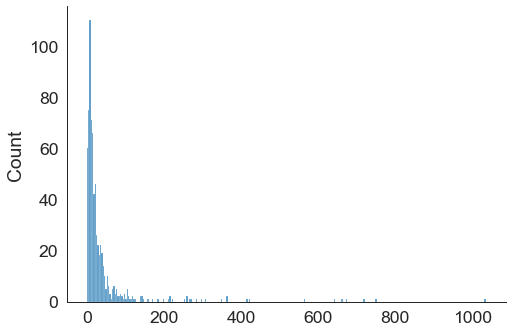

In [200]:
# plotting histogram for # of parcels
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=parcel, kind="hist", bins = 300, aspect = 1.5)

,sumsquare_error,aic,bic,kl_div
lognorm,0.000050,2179.421210,-11624.557253,inf
beta,0.000051,5813.361034,-11599.468446,inf
burr,0.000070,2034.128036,-11377.602055,inf
norm,0.001415,5076.932758,-9263.639488,inf
gamma,0.001913,28272.109485,-9044.017691,inf


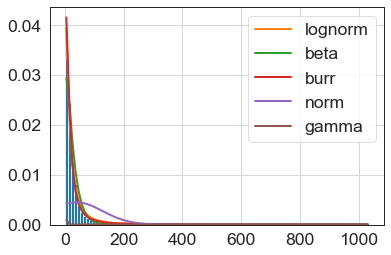

In [201]:
f = Fitter(parcel,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()
f.summary()

In [202]:
# We can see that the lognorm distribution is the best fit based on the sumsquare_error criteria.

In [203]:
f.get_best(method = 'sumsquare_error')

{'lognorm': {'s': 1.1823428153991393,
  'loc': -0.1886494756247153,
  'scale': 16.81071768144596}}

In [204]:
f.fitted_param["lognorm"]

(1.1823428153991393, -0.1886494756247153, 16.81071768144596)